Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the data

In [ ]:
data = pd.read_csv("/content/Iris Dataset.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data["Species"]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [ ]:
replace_species={"Iris-setosa":0,"Iris-virginica":2,"Iris-versicolor":1}
data.Species=[replace_species[item] for item in data.Species]

In [ ]:
data = data.drop(columns=['Id'])

In [ ]:
data.drop(['Species'], axis = 1)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
train = data.drop(columns=['Species'])
test = data['Species']

In [ ]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
X = data.iloc[:, [3, 4]].values

In [ ]:
m=X.shape[0] 
n=X.shape[1] 
n_iter=100

In [ ]:
K=5 

In [ ]:
Centroids=np.array([]).reshape(n,0) 


In [ ]:
import random as rd
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

In [ ]:
Output={}


In [ ]:
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
      tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
      EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1

In [ ]:
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)

In [ ]:
for i in range(n_iter):
     
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y

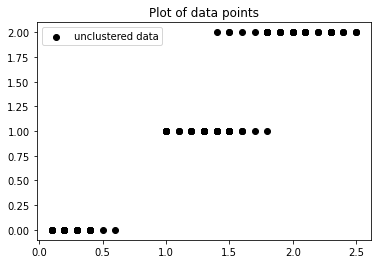

In [ ]:
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')

plt.legend()
plt.title('Plot of data points')
plt.show()

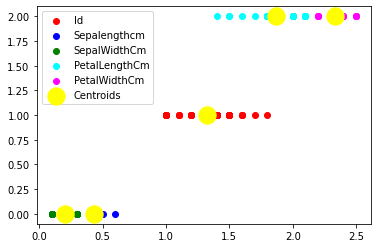

In [ ]:
color=['red','blue','green','cyan','magenta']
labels=['Id','Sepalengthcm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')

plt.legend()
plt.show()

In [ ]:
train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
test

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [ ]:
clusters=len(np.unique(test))
print(clusters)

3


In [ ]:
from collections import defaultdict


class KMeans:
    
    def __init__(self,data,k,max_ite):
        self.data=data
        self.k=k
        self.max_ite=max_ite
        
    def predict(self):

        centroids = defaultdict(int)
        
        K=self.k
        max_iter=self.max_ite
        
        for i in range(K):
            centroids[i] = self.data[i]



        r=0


        for i in range(max_iter):
            r=r+1
            classes=defaultdict(list)
            
            for key in range(K):
                classes[key]=[]
            for datapoint in self.data:
                distance=[]
                for j in range(K):

                    dis=euclidean_dis(datapoint,centroids[j])

                    distance.append(dis)
                mindis=min(distance)

                index=distance.index(mindis)
                classes[index].append(datapoint)
                old_centroid=dict(centroids)

            for t in range(K):
                class_=classes[t]


                new_centroid=np.mean(class_,axis=0)
                centroids[t]=new_centroid
            flg=1
            for t in range(K):

                a=centroids[t]
                b=old_centroid[t]
                if np.sum((a - b)/b * 100) > 0.001:
                    flg = 0



            if flg==1:
                break


        return classes,centroids

In [ ]:
data.values[:,:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
def euclidean_dis(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [ ]:
kmeans=KMeans(data.values[:,:4],clusters,10000)

classes,centroids=kmeans.predict()

for i in range(0,3):
    classes[i]=np.array(classes[i]).tolist()
    
for i in range(0,3):
    print(len(classes[i]))
print(centroids)

39
61
50
defaultdict(<class 'int'>, {0: array([6.85384615, 3.07692308, 5.71538462, 2.05384615]), 1: array([5.88360656, 2.74098361, 4.38852459, 1.43442623]), 2: array([5.006, 3.418, 1.464, 0.244])})


In [ ]:
class0=[]
class1=[]
class2=[]

for i in range(len(test)):
    if test[i]==0:
        class0.append(train.iloc[i])
    elif test[i]==1:
        class1.append(train.iloc[i])
    elif test[i]==2:
        class2.append(train.iloc[i])


class0=np.array(class0).tolist()
class1=np.array(class1).tolist()
class2=np.array(class2).tolist()




def subset(array1,array2):
    flg=0
    for i in range(len(array1)):
        if(array2==array1[i]):
            flg=1
            break
    if(flg==1):
        return True
    else:
        return False
    

# confusion matrix
    
def confusion_matrix(a,b,c,classes):
    
    cm=[[0 for i in range(3)] for i in range(3)]

    for element in a:

        if subset(classes[2],element):
            cm[0][0]=cm[0][0]+1
        elif subset(classes[1],element):
            cm[0][1]=cm[0][1]+1
        elif subset(classes[0],element):
            cm[0][2]=cm[0][2]+1

    for element in b:

        if subset(classes[2],element):
            cm[1][0]=cm[1][0]+1
        elif subset(classes[1],element):
            cm[1][1]=cm[1][1]+1
        elif subset(classes[0],element):
            cm[1][2]=cm[1][2]+1

    for element in c:

        if subset(classes[2],element):

            cm[2][0]=cm[2][0]+1
        elif subset(classes[1],element):

            cm[2][1]=cm[2][1]+1
        elif subset(classes[0],element):

            cm[2][2]=cm[2][2]+1
            
    return cm


# performance metrics
            
class Metrics:
    
    def __init__(self,confusion_m):
        self.confusion_m=confusion_m
        self.total=np.sum(confusion_m)
        self.diagonal=np.sum(np.diag(confusion_m))
    
    def accuracy(self):
        accuracy=(self.diagonal/self.total)
        return accuracy

In [ ]:
classes

defaultdict(list,
            {0: [[7.0, 3.2, 4.7, 1.4],
              [6.9, 3.1, 4.9, 1.5],
              [6.7, 3.0, 5.0, 1.7],
              [6.3, 3.3, 6.0, 2.5],
              [7.1, 3.0, 5.9, 2.1],
              [6.3, 2.9, 5.6, 1.8],
              [6.5, 3.0, 5.8, 2.2],
              [7.6, 3.0, 6.6, 2.1],
              [7.3, 2.9, 6.3, 1.8],
              [6.7, 2.5, 5.8, 1.8],
              [7.2, 3.6, 6.1, 2.5],
              [6.5, 3.2, 5.1, 2.0],
              [6.4, 2.7, 5.3, 1.9],
              [6.8, 3.0, 5.5, 2.1],
              [6.4, 3.2, 5.3, 2.3],
              [6.5, 3.0, 5.5, 1.8],
              [7.7, 3.8, 6.7, 2.2],
              [7.7, 2.6, 6.9, 2.3],
              [6.9, 3.2, 5.7, 2.3],
              [7.7, 2.8, 6.7, 2.0],
              [6.7, 3.3, 5.7, 2.1],
              [7.2, 3.2, 6.0, 1.8],
              [6.4, 2.8, 5.6, 2.1],
              [7.2, 3.0, 5.8, 1.6],
              [7.4, 2.8, 6.1, 1.9],
              [7.9, 3.8, 6.4, 2.0],
              [6.4, 2.8, 5.6, 2.2],
       

Create the confusion matrix for the classification

In [ ]:
matrix=confusion_matrix(class0,class1,class2,classes)
performance=Metrics(matrix)

accuracy=performance.accuracy()


print('confusion matrix is:',end='\n')
print(np.array(matrix),end='\n')

print("Accuracy of the model is {}".format(accuracy*100))

confusion matrix is:
[[50  0  0]
 [ 0 47  3]
 [ 0 14 36]]
Accuracy of the model is 88.66666666666667
